In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/patricio/hdd/metnum-tp3/tp3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/patricio/hdd/metnum-tp3
-- Configuring done
-- Generating 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/patricio/hdd/metnum-tp3/notebooks
Python 3.8.5


In [4]:
df = pd.read_csv('../data/train.csv')

In [5]:
pd.set_option('display.max_colwidth', -1)
with open('./asd.html', 'w') as f:
    f.write(
        df['descripcion'].to_string(header = False, index = False, max_rows=1000)
    )

<ipython-input-5-184e613822e5>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
df = df[df['ciudad']=='Mérida'].dropna()

In [7]:
x = df['metroscubiertos'].values

In [8]:
y = df['precio'].values

In [9]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [10]:
x.shape

(518, 1)

In [11]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

linear_regressor_scikit = LinearRegression()
linear_regressor = metnum.LinearRegression()

linear_regressor_scikit.fit(x,y)
linear_regressor.fit(x,y)

In [12]:
df['prediction'] = linear_regressor_scikit.predict(x)
df['prediction2'] = linear_regressor.predict(x)

<AxesSubplot:xlabel='metroscubiertos', ylabel='precio'>

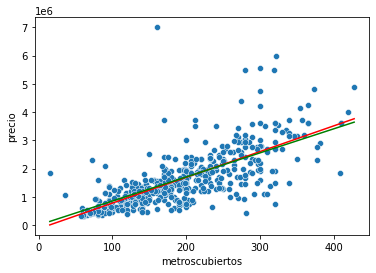

In [13]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')
sns.lineplot(data=df, x='metroscubiertos', y='prediction2', color='green')


In [15]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(df['precio'].values.reshape(-1,1), df['prediction2'].values.reshape(-1,1), squared=True)
print(rms)

443367086054.4025


In [20]:
 'es grandote' if 443367086054.4025 - 1522145649524.6719 < 0 else 'xikito'

'es grandote'